In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df=pd.read_csv('WorldPopulation2023.csv')
df.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,N.A.,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %


In [3]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


In [5]:
df['Fert.Rate'].fillna(df['Fert.Rate'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         0
UrbanPop%         0
WorldShare        0
dtype: int64

In [9]:
df.shape

(233, 12)

In [10]:
x=df['UrbanPop%'].str.split("%")
df['UrbanPop%']=x.str[0]
df['UrbanPop%'].values

array(['26 ', '67 ', '75 ', 'N.A.', '85 ', '68 ', '98 ', '28 ', '94 ',
       '67 ', '45 ', '86 ', '59 ', '57 ', '85 ', 'N.A.', '41 ', '32 ',
       '80 ', '99 ', '48 ', '48 ', '94 ', '49 ', '69 ', '54 ', '69 ',
       '88 ', '53 ', '80 ', '78 ', '32 ', '15 ', '67 ', '26 ', '58 ',
       '81 ', '74 ', '95 ', '40 ', '24 ', '85 ', '65 ', '81 ', '33 ',
       '70 ', '79 ', '82 ', '59 ', '80 ', '77 ', '65 ', '75 ', '52 ',
       '88 ', '72 ', '75 ', '85 ', '46 ', '64 ', '41 ', '78 ', '67 ',
       '67 ', '68 ', '31 ', '22 ', '41 ', '62 ', '59 ', '87 ', '84 ',
       '90 ', '59 ', '85 ', '58 ', '63 ', '77 ', '57 ', 'N.A.', '86 ',
       '89 ', '32 ', 'N.A.', '95 ', '55 ', '40 ', '45 ', '27 ', '60 ',
       '58 ', 'N.A.', '68 ', '88 ', '36 ', '59 ', '74 ', '71 ', '64 ',
       '55 ', '92 ', '72 ', '59 ', '94 ', '85 ', '57 ', '31 ', '56 ',
       'N.A.', '37 ', '37 ', '69 ', '97 ', '31 ', '54 ', '82 ', '15 ',
       '71 ', '88 ', '97 ', '40 ', '19 ', '78 ', '39 ', '44 ', '78 ',
       'N.A.',

In [11]:
x=df['WorldShare'].str.split("%")
df['WorldShare']=x.str[0]
df['WorldShare'].values

array(['0.53 ', '0.04 ', '0.57 ', '0.00 ', '0.00 ', '0.46 ', '0.00 ',
       '0.00 ', '0.57 ', '0.03 ', '0.00 ', '0.33 ', '0.11 ', '0.13 ',
       '0.01 ', '0.02 ', '2.15 ', '0.00 ', '0.12 ', '0.15 ', '0.01 ',
       '0.17 ', '0.00 ', '0.01 ', '0.15 ', '0.04 ', '0.03 ', '2.69 ',
       '0.00 ', '0.01 ', '0.08 ', '0.29 ', '0.16 ', '0.01 ', '0.21 ',
       '0.36 ', '0.48 ', '0.00 ', '0.00 ', '0.07 ', '0.23 ', '0.24 ',
       '17.72 ', '0.65 ', '0.01 ', '0.08 ', '0.00 ', '0.06 ', '0.05 ',
       '0.14 ', '0.00 ', '0.02 ', '0.13 ', '0.36 ', '0.07 ', '0.01 ',
       '0.00 ', '0.14 ', '1.27 ', '0.23 ', '1.40 ', '0.08 ', '0.02 ',
       '0.05 ', '0.02 ', '0.02 ', '1.57 ', '0.00 ', '0.00 ', '0.01 ',
       '0.07 ', '0.80 ', '0.00 ', '0.00 ', '0.03 ', '0.03 ', '0.05 ',
       '1.04 ', '0.42 ', '0.00 ', '0.13 ', '0.00 ', '0.00 ', '0.00 ',
       '0.00 ', '0.22 ', '0.18 ', '0.03 ', '0.01 ', '0.15 ', '0.13 ',
       '0.09 ', '0.13 ', '0.00 ', '17.76 ', '3.45 ', '1.11 ', '0.57 ',
       '0.06 ', '0

In [12]:
df.describe()

,Rank,Population2023,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge
count,233.000000,2.330000e+02,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,233.000000,233.000000
mean,117.000000,3.452318e+07,3.013107e+05,473.905579,5.583429e+05,1.306867e+01,2.414163,31.309013
std,67.405489,1.376633e+08,1.003778e+06,2325.067631,1.694269e+06,1.701990e+05,1.155913,9.628386
min,1.000000,1.893000e+03,-2.957105e+06,0.000000,1.000000e+00,-9.104750e+05,0.800000,15.000000
25%,59.000000,5.210210e+05,2.450000e+02,38.000000,2.830000e+03,-9.999000e+03,1.600000,22.000000
50%,117.000000,5.742315e+06,2.865200e+04,96.000000,8.220000e+04,-5.000000e+02,2.000000,32.000000
75%,175.000000,2.325148e+07,2.278660e+05,242.000000,4.103400e+05,5.000000e+02,3.000000,40.000000
max,233.000000,1.428628e+09,1.145449e+07,24360.000000,1.637687e+07,1.784718e+06,6.700000,54.000000


In [13]:
df['WorldShare']=df['WorldShare'].astype(float)


In [14]:
df.drop('Country',axis=1,inplace=True)
df.drop('YearlyChange',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 233
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            233 non-null    int64  
 1   Population2023  233 non-null    int64  
 2   NetChange       233 non-null    int64  
 3   Density(P/Km²)  233 non-null    int64  
 4   Land Area(Km²)  233 non-null    int64  
 5   Migrants(net)   233 non-null    int64  
 6   Fert.Rate       233 non-null    float64
 7   MedianAge       233 non-null    float64
 8   UrbanPop%       233 non-null    object 
 9   WorldShare      233 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 20.0+ KB


In [ ]:
sns.boxplot()

In [16]:
corelation=df['Population2023'].corr(df['NetChange'])
corelation

0.620983609549096

<Axes: xlabel='Population2023', ylabel='NetChange'>

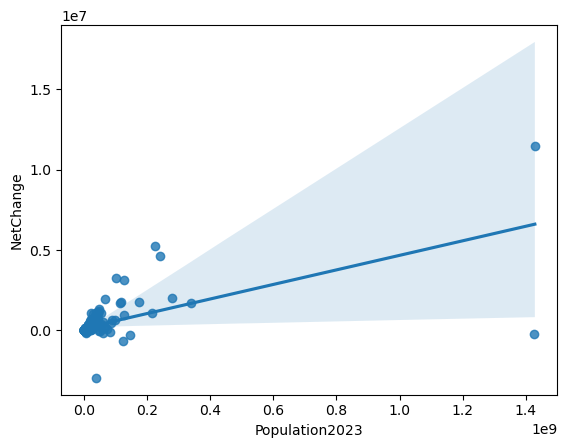

In [17]:
sns.regplot(x=df['Population2023'],y=df['NetChange'],data=df)

In [18]:
corelation=df['Population2023'].corr(df['Land Area(Km²)'])
corelation

0.4515702230663885

<Axes: xlabel='Population2023', ylabel='Land Area(Km²)'>

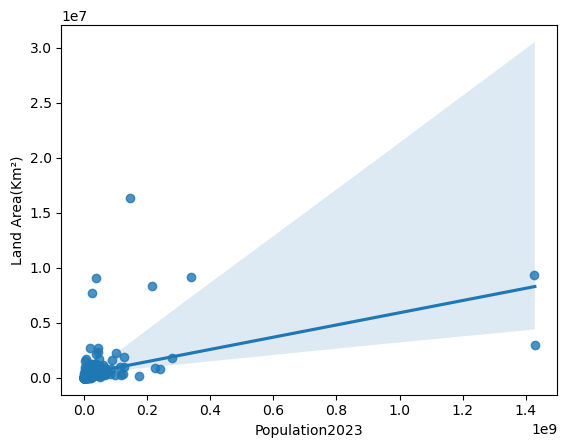

In [19]:
sns.regplot(x=df['Population2023'],y=df['Land Area(Km²)'],data=df)

In [20]:
corelation=df['Population2023'].corr(df['WorldShare'])
corelation

0.9999986965817584

<Axes: xlabel='Population2023', ylabel='WorldShare'>

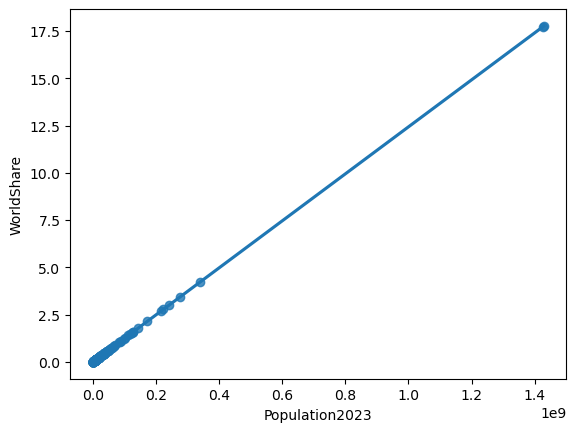

In [21]:
sns.regplot(x=df['Population2023'],y=df['WorldShare'],data=df)

In [22]:
corelation=df['Land Area(Km²)'].corr(df['WorldShare'])
corelation

0.4517200464625122

<Axes: xlabel='WorldShare', ylabel='Land Area(Km²)'>

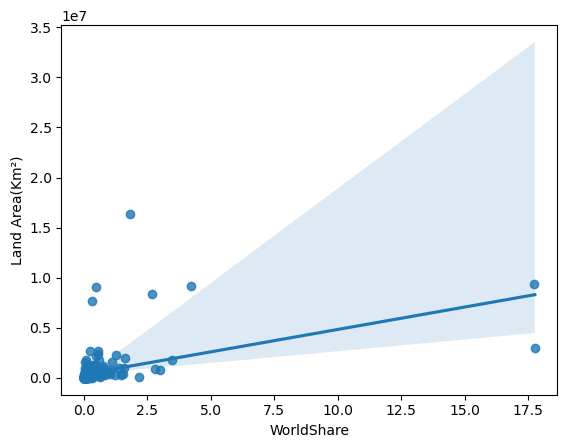

In [23]:
sns.regplot(x=df['WorldShare'],y=df['Land Area(Km²)'],data=df)

In [24]:
corelation=df['MedianAge'].corr(df['Fert.Rate'])
corelation

-0.8536665517851585

<Axes: xlabel='MedianAge', ylabel='Fert.Rate'>

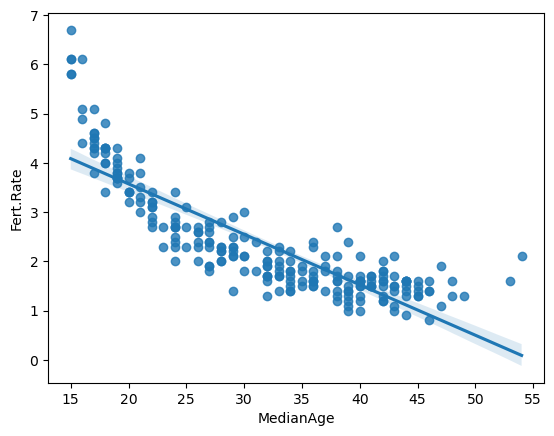

In [25]:
sns.regplot(x=df['MedianAge'],y=df['Fert.Rate'],data=df)

In [26]:
df.drop(columns=['UrbanPop%','Density(P/Km²)'],inplace=True,axis=1)
df.columns

Index(['Rank', 'Population2023', 'NetChange', 'Land Area(Km²)',
       'Migrants(net)', 'Fert.Rate', 'MedianAge', 'WorldShare'],
      dtype='object')

# now creating a predictive model

In [69]:
x=df[['MedianAge']]
#X=df[[ 'Population2023','Land Area(Km²)', 'Migrants(net)', 'Fert.Rate' ]]
y=df['Fert.Rate']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

1.2344795632529044

# as we know our model is unterfitted

# we can use different features or columns to target the prediction which we want